# Natural Language Processing

## Exercise Sheet 2

In [1]:
#imports for all exercises
import nltk
from nltk.corpus import inaugural,names, brown, stopwords
from nltk.corpus import wordnet as wn
import matplotlib.pylab as plt
import string
from collections import Counter

### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


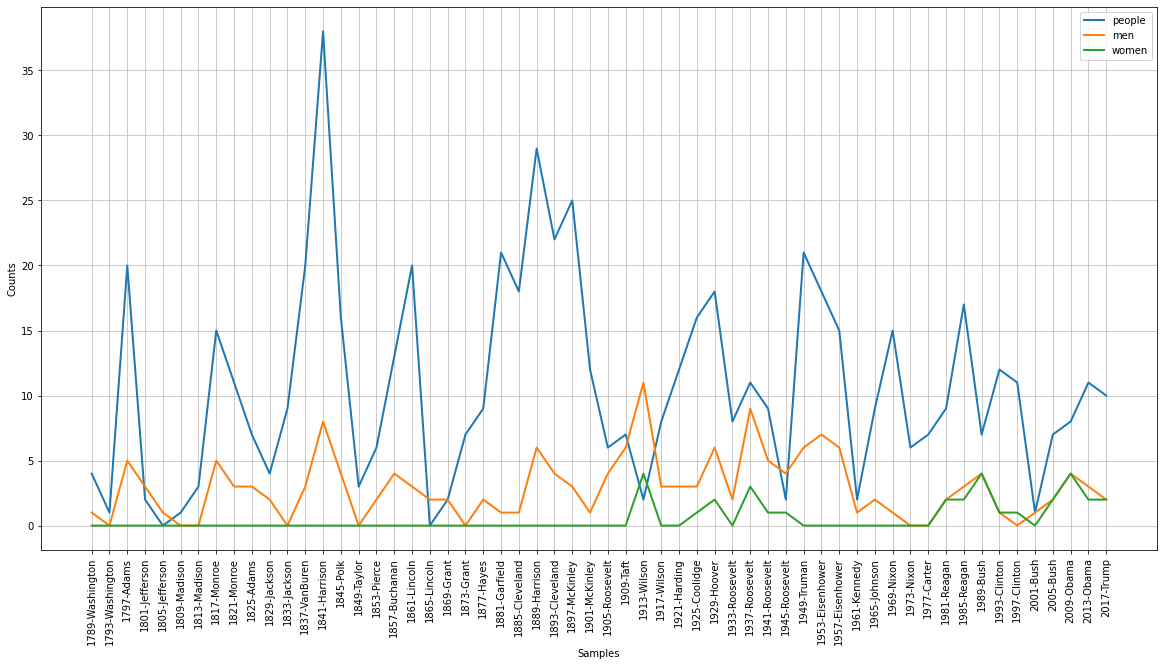

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:

plt.rcParams['figure.figsize'] = [20,10]

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:-4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men', 'women','people']
    if w.lower().startswith(target))
cfd.plot()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

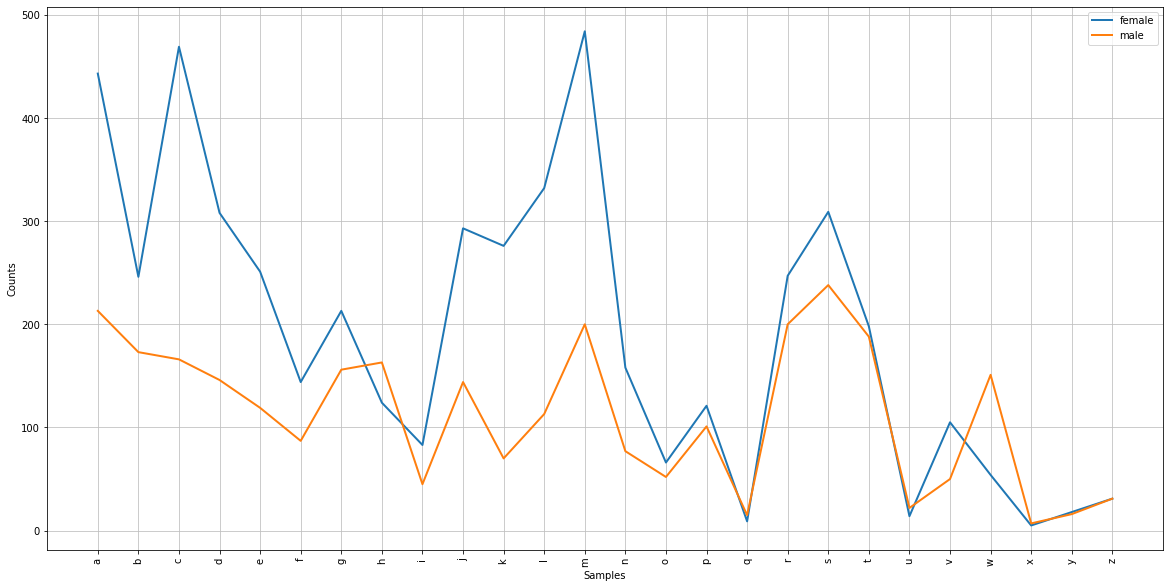

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
plt.rcParams['figure.figsize'] = [20,10]

cfd = nltk.ConditionalFreqDist(
    ( fileid[:-4],target)
    for fileid in names.fileids()
    for w in names.words(fileid)
    for target_list in list(string.ascii_lowercase)
    for target in target_list
    if w.lower().startswith(target))
cfd.plot()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [137]:
def noun_wo_hyponyms():
    all_noun_synsets = list(wn.all_synsets('n'))
    all_nouns_number = len(all_noun_synsets)
    counter = 0
    for element in all_noun_synsets:
        if len(element.hyponyms()) == 0:
            counter +=1
    print(str((counter/all_nouns_number)*100)+ "% have no hyponym" )

noun_wo_hyponyms()

79.67119283931072% have no hyponym


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [54]:
def supergloss(s):
    return_string = ""
    return_string += s.definition()
    for hypo in s.hyponyms():
        return_string += "\n"+ hypo.definition()

    for hyper in s.hyponyms():
        return_string += "\n"+ hyper.definition()


    return (return_string)

print(supergloss(wn.synset("car.n.01")))


a motor vehicle with four wheels; usually propelled by an internal combustion engine
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a car that is lent as a replacement for one that is under repa

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [4]:
def min_word_occurence(text,n):
    fdist = nltk.FreqDist(w.lower() for w in text.words())
    return list(item for item in fdist if fdist[item] >= n and item.isalpha())

min_word_occurence(brown,200)

['the',
 'of',
 'and',
 'to',
 'a',
 'in',
 'that',
 'is',
 'was',
 'he',
 'for',
 'it',
 'with',
 'as',
 'his',
 'on',
 'be',
 'at',
 'by',
 'i',
 'this',
 'had',
 'not',
 'are',
 'but',
 'from',
 'or',
 'have',
 'an',
 'they',
 'which',
 'one',
 'you',
 'were',
 'her',
 'all',
 'she',
 'there',
 'would',
 'their',
 'we',
 'him',
 'been',
 'has',
 'when',
 'who',
 'will',
 'more',
 'if',
 'no',
 'out',
 'so',
 'said',
 'what',
 'up',
 'its',
 'about',
 'into',
 'than',
 'them',
 'can',
 'only',
 'other',
 'new',
 'some',
 'could',
 'time',
 'these',
 'two',
 'may',
 'then',
 'do',
 'first',
 'any',
 'my',
 'now',
 'such',
 'like',
 'our',
 'over',
 'man',
 'me',
 'even',
 'most',
 'made',
 'also',
 'after',
 'did',
 'many',
 'before',
 'must',
 'af',
 'through',
 'back',
 'years',
 'where',
 'much',
 'your',
 'way',
 'well',
 'down',
 'should',
 'because',
 'each',
 'just',
 'those',
 'people',
 'too',
 'how',
 'little',
 'state',
 'good',
 'very',
 'make',
 'world',
 'still',
 'see',

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


### The lexical diversity score is the number of times each vocabulary item appears in the text on average


In [79]:
# get the length of the list of ALL words and then the length of the set that has each word just one time
def lex_div_score(text):
    for genre in text.categories():
        num_words = len(text.words(categories=genre))
        num_vocab = len(set(w.lower() for w in text.words(categories=genre)))
        print(round(num_words/num_vocab), genre)

lex_div_score(brown)

8 adventure
10 belles_lettres
7 editorial
8 fiction
10 government
8 hobbies
5 humor
12 learned
8 lore
9 mystery
8 news
7 religion
5 reviews
9 romance
5 science_fiction


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [7]:
# select the words in the category (in example 'news') and check if they are not stopwords.
# Sort them by their occurence in descending order
# return the first n of them (in example 50)

def find_most_frequent_words(text,category,n):
    return sorted(nltk.FreqDist(w.lower() for w in text.words(categories=category) if w.lower() not in stopwords.words('english') and w.isalpha()).items() , key=lambda item: item[1],reverse=True)[:n]


find_most_frequent_words(brown,'news',50)

[('said', 406),
 ('would', 246),
 ('new', 241),
 ('one', 213),
 ('last', 177),
 ('two', 174),
 ('first', 158),
 ('state', 153),
 ('year', 142),
 ('president', 142),
 ('home', 132),
 ('also', 129),
 ('made', 107),
 ('time', 103),
 ('years', 102),
 ('three', 101),
 ('house', 97),
 ('week', 94),
 ('city', 93),
 ('may', 93),
 ('school', 87),
 ('could', 87),
 ('four', 82),
 ('day', 76),
 ('committee', 75),
 ('man', 74),
 ('members', 74),
 ('back', 73),
 ('government', 73),
 ('many', 72),
 ('national', 72),
 ('university', 70),
 ('bill', 69),
 ('get', 68),
 ('high', 68),
 ('work', 67),
 ('since', 67),
 ('american', 67),
 ('program', 66),
 ('kennedy', 66),
 ('night', 65),
 ('john', 65),
 ('board', 64),
 ('administration', 62),
 ('meeting', 62),
 ('county', 61),
 ('per', 61),
 ('even', 61),
 ('states', 60),
 ('tax', 58)]

### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [9]:
# create the bigrams with nltk.bigrams and check if neither of the words in the bigram is in the stopword. 
# Sort them descending by occurence and return the first n elements

def find_most_frequent_bigrams(text,category,n):
    return sorted(nltk.FreqDist((w[0].lower(),w[1].lower() ) for w in nltk.bigrams(text.words(categories=category)) if w[0].lower()  not in stopwords.words('english') and w[0].isalpha()  and w[1].lower() not in stopwords.words('english') and w[1].isalpha()).items() , key=lambda item: item[1],reverse=True)[:n]


find_most_frequent_bigrams(brown,'news',50)

[(('new', 'york'), 52),
 (('per', 'cent'), 50),
 (('united', 'states'), 37),
 (('last', 'week'), 35),
 (('last', 'year'), 34),
 (('white', 'house'), 29),
 (('high', 'school'), 23),
 (('home', 'runs'), 23),
 (('president', 'kennedy'), 19),
 (('last', 'night'), 18),
 (('years', 'ago'), 15),
 (('san', 'francisco'), 15),
 (('premier', 'khrushchev'), 13),
 (('kansas', 'city'), 13),
 (('vice', 'president'), 12),
 (('los', 'angeles'), 12),
 (('united', 'nations'), 11),
 (('new', 'orleans'), 11),
 (('police', 'said'), 11),
 (('sales', 'tax'), 10),
 (('two', 'years'), 10),
 (('american', 'catholic'), 10),
 (('el', 'paso'), 9),
 (('social', 'security'), 9),
 (('kennedy', 'administration'), 9),
 (('first', 'time'), 9),
 (('country', 'club'), 9),
 (('rules', 'committee'), 9),
 (('air', 'force'), 9),
 (('tax', 'bill'), 9),
 (('grand', 'jury'), 8),
 (('jury', 'said'), 8),
 (('city', 'council'), 8),
 (('would', 'like'), 8),
 (('rhode', 'island'), 8),
 (('weeks', 'ago'), 8),
 (('american', 'league'), 

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [118]:
def word_freq(word,genre,text=brown):
    return nltk.FreqDist(text.words(categories=genre))[word]

print("Occurence of love in category news: " + str(word_freq("love","news")))
print("Occurence of love in category romance: " + str(word_freq("love","romance")))


Occurence of love in category news: 3
Occurence of love in category romance: 32


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [15]:
# iterate over all languages
# check if the encoding-type == latin1
# check if thw lowercase word appears in all lowercase words in that language
# if yes add them to the return list

def find_language(word,encoding="latin-1"):
    valid_languages = []
    for fileId in nltk.corpus.udhr.fileids():
        if nltk.corpus.udhr.encoding(fileId) == encoding:
            if word.lower() in list(words.lower() for words in  nltk.corpus.udhr.words(fileId)):
                valid_languages.append(fileId)
    return valid_languages


find_language("basis")

['Afrikaans-Latin1', 'English-Latin1', 'Luxembourgish_Letzebuergeusch-Latin1']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

### The top of the hierarchy are very general and sometimes abstract concepts. As you go down the hierarchy the tree **branches** in several leaves, which stand for more specific concepts. The word net is semantically-oriented meaning, that all children of the same parent stand for the same or at least very similar concept. So going up the tree, all children that are semantically the same can be described by one parent (hypernym)

In [141]:
def avg_hyponyms():
    all_noun_synsets = list(wn.all_synsets('n'))
    counter = 0
    counter_hyponyms = 0
    for element in all_noun_synsets:
        if len(element.hyponyms()) != 0:
            counter +=1
            counter_hyponyms += len(element.hyponyms())

    print("Nouns with hyponyms have in average " + str(counter_hyponyms/counter) + " hyponyms.")

avg_hyponyms()

Nouns with hyponyms have in average 4.543820763194153 hyponyms.
